In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset & display samples
df=pd.read_csv('email.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
# the number of rows and columns in the dataset 
df.shape

(5572, 2)

In [4]:
# Getting some info about the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# statistical measures about the data 
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
#columns of the dataset
df.columns

Index(['Category', 'Message'], dtype='object')

In [7]:
#checking duplicate values
df.duplicated().sum()

415

In [8]:
#removing duplicate values
df=df.drop_duplicates()
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
# Checking the distribution of target category values
df["Category"].value_counts()

ham     4516
spam     641
Name: Category, dtype: int64

In [10]:
#checking missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

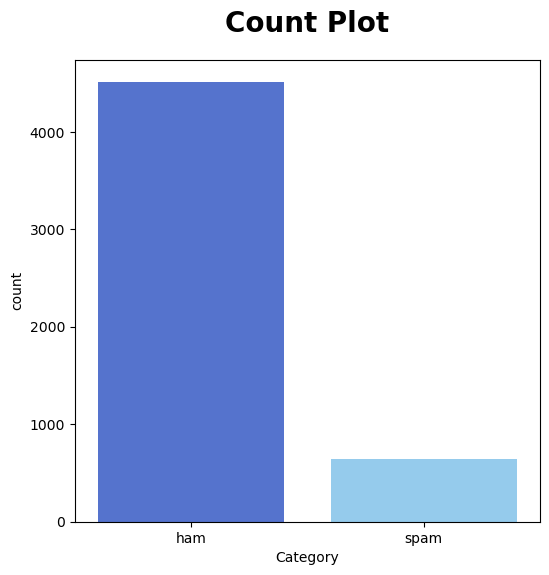

In [11]:
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='Category',palette=['royalblue','lightskyblue'])
plt.xlabel('Category')
plt.ylabel('count')
plt.title('Count Plot',pad=20,fontweight="black",size=20)
plt.show()

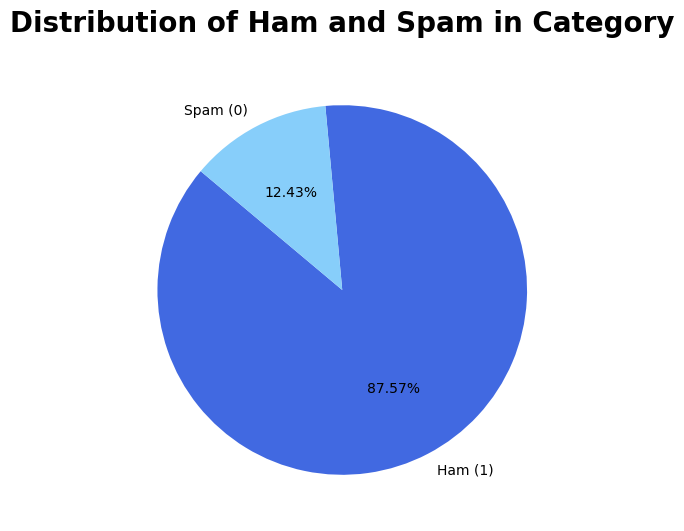

In [12]:
category_counts = df['Category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(category_counts, labels=['Ham (1)', 'Spam (0)'], autopct='%1.2f%%', startangle=140,colors=['royalblue','lightskyblue'])
plt.title('Distribution of Ham and Spam in Category',pad=20,fontweight="black",size=20)
plt.show()

In [13]:
# Convert the "Category" column values to numerical representation (0 for "spam" and 1 for "ham")
df['Category']=df['Category'].map({'spam':0,'ham':1})

In [14]:
# Separate the feature (message) and target (category) data
x=df['Message']
y=df['Category']

In [15]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5157, dtype: object


In [16]:
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5157, dtype: int64

In [17]:
# splitting the data into training data and testing data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [18]:
#Create a TF-IDF vectorizer to convert text messages into numerical feature
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x_train_features=feature_extraction.fit_transform(x_train)
x_test_features=feature_extraction.transform(x_test)
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [19]:
# logistic regression
model = LogisticRegression()
model.fit(x_train_features,y_train)

LogisticRegression()

In [20]:
# accuracy on training data
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
print('Accuracy on training data: {} %'.format(accuracy_on_training_data * 100))

Accuracy on training data: 96.16969696969697 %


In [21]:
# accuracy on testing data 
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
print('Accuracy on test data: {} %'.format(accuracy_on_test_data * 100))    

Accuracy on test data: 96.51162790697676 %


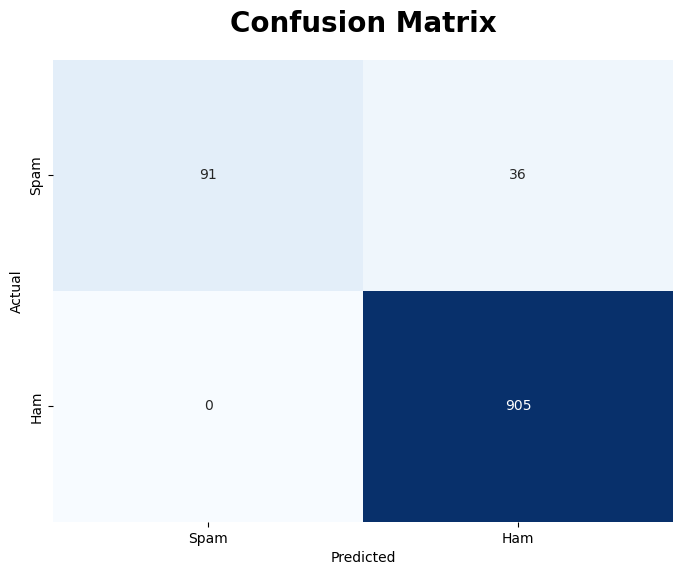

In [22]:
# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, prediction_on_test_data)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix',pad=20,fontweight="black",size=20)
plt.show()

In [23]:
# Classification report
classification_rep = classification_report(y_test, prediction_on_test_data,target_names=['Spam', 'Ham'])
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

        Spam       1.00      0.72      0.83       127
         Ham       0.96      1.00      0.98       905

    accuracy                           0.97      1032
   macro avg       0.98      0.86      0.91      1032
weighted avg       0.97      0.97      0.96      1032



In [24]:
#Make Predictions on New Input
input_your_mail ="Dear John, I hope this email finds you well. Attached is the report you requested for our upcoming meeting. Please review it at your convenience"
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Ham Mail


In [25]:
input_your_mail ="Congratulations! You've won a luxury vacation package worth $10,000! Click here to claim your prize now!"
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail


In [26]:
input_your_mail="WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."
input_data_features = feature_extraction.transform([input_your_mail])
prediction = model.predict(input_data_features)
if prediction[0] == 1:
    print("Ham Mail")
else:
    print("Spam Mail")

Spam Mail
